In [1]:
import re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from colorama import Fore
from urllib.parse import urlparse
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from tld import get_tld, is_tld
from tld.exceptions import TldDomainNotFound, TldBadUrl, TldIOError
import whois
from datetime import datetime
from plotly.subplots import make_subplots
from wordcloud import WordCloud
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
import nltk
import tldextract
import hashlib
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [2]:
df = pd.read_csv(r"C:\Users\DELL\Downloads\url_dataset.csv") 
df.head()

url        type
0                                   br-icloud.com.br    phishing
1                mp3raid.com/music/krizz_kaliko.html      benign
2                    bopsecrets.org/rexroth/cr/1.htm      benign
3  http://www.garage-pirenne.be/index.php?option=...  defacement
4  http://adventure-nicaragua.net/index.php?optio...  defacement

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651191 entries, 0 to 651190
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   url     651191 non-null  object
 1   type    651191 non-null  object
dtypes: object(2)
memory usage: 9.9+ MB


In [4]:
df.isnull().sum()

url     0
type    0
dtype: int64

In [5]:
count =df['type'].value_counts()

# Define a color scale for the bars
colors = [
    '#00BFFF', '#FFB399', '#8A2BE2', '#FFFF99', '#00B3E6',
    '#E6B333', '#3366E6', '#999966', '#FF69B4', '#B34D4D'
]
fig = go.Figure(data=[go.Bar(x=count.index, y=count, marker=dict(color=colors))])

# Update layout
fig.update_layout(
    xaxis_title='Types',
    yaxis_title='Count',
    title='Count of Different Types of URLs',
    plot_bgcolor='rgb(240,248,255)', 
    paper_bgcolor='rgb(255,240,245)',  
    font=dict(color='black')  # Set font color to black
)

# Update x-axis tick font color
fig.update_xaxes(tickfont=dict(color='black'))

# Update y-axis tick font color
fig.update_yaxes(tickfont=dict(color='black'))

fig.show()

In [6]:
df["type"].value_counts()

benign        428103
defacement     96457
phishing       94111
malware        32520
Name: type, dtype: int64

In [7]:
df["url_type"] = df["type"].replace({
    'benign':0,
    'defacement':1,
    'phishing':2,
    'malware':3
});

In [8]:
df.head()

url        type  url_type
0                                   br-icloud.com.br    phishing         2
1                mp3raid.com/music/krizz_kaliko.html      benign         0
2                    bopsecrets.org/rexroth/cr/1.htm      benign         0
3  http://www.garage-pirenne.be/index.php?option=...  defacement         1
4  http://adventure-nicaragua.net/index.php?optio...  defacement         1

In [9]:
import re
#Use of IP or not in domain
def having_ip_address(url):
    match = re.search(
        '(([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.'
        '([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\/)|'  # IPv4
        '((0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\/)' # IPv4 in hexadecimal
        '(?:[a-fA-F0-9]{1,4}:){7}[a-fA-F0-9]{1,4}', url)  # Ipv6
    if match:
        # print match.group()
        return 1
    else:
        # print 'No matching pattern found'
        return 0
df['use_of_ip'] = df['url'].apply(lambda i: having_ip_address(i))

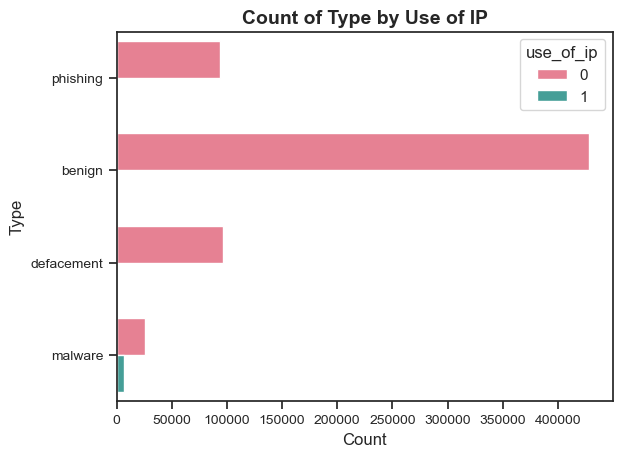

<Figure size 800x600 with 0 Axes>

In [10]:

# Set the style
sns.set(style="ticks")

# Create the countplot with custom styling
ax = sns.countplot(y="type", data=df, hue="use_of_ip", palette="husl")

# Set the title and axes labels
ax.set_title("Count of Type by Use of IP", fontsize=14, fontweight='bold')
ax.set_xlabel("Count", fontsize=12)
ax.set_ylabel("Type", fontsize=12)

# Modify the font size of the tick labels
ax.tick_params(axis='both', which='major', labelsize=10)

# Adjust the figure size
plt.figure(figsize=(8, 6))

# Remove the top and right spines
sns.despine()

# Show the plot
plt.show()


In [11]:
from urllib.parse import urlparse

def abnormal_url(url):
    hostname = urlparse(url).hostname
    hostname = str(hostname)
    match = re.search(hostname, url)
    if match:
        # print match.group()
        return 1
    else:
        # print 'No matching pattern found'
        return 0


df['abnormal_url'] = df['url'].apply(lambda i: abnormal_url(i))

In [12]:
df.head()

url        type  url_type  \
0                                   br-icloud.com.br    phishing         2   
1                mp3raid.com/music/krizz_kaliko.html      benign         0   
2                    bopsecrets.org/rexroth/cr/1.htm      benign         0   
3  http://www.garage-pirenne.be/index.php?option=...  defacement         1   
4  http://adventure-nicaragua.net/index.php?optio...  defacement         1   

   use_of_ip  abnormal_url  
0          0             0  
1          0             0  
2          0             0  
3          0             1  
4          0             1

In [13]:
def count_dot(url):
    count_dot = url.count('.')
    return count_dot

df['count.'] = df['url'].apply(lambda i: count_dot(i))
df.head()


url        type  url_type  \
0                                   br-icloud.com.br    phishing         2   
1                mp3raid.com/music/krizz_kaliko.html      benign         0   
2                    bopsecrets.org/rexroth/cr/1.htm      benign         0   
3  http://www.garage-pirenne.be/index.php?option=...  defacement         1   
4  http://adventure-nicaragua.net/index.php?optio...  defacement         1   

   use_of_ip  abnormal_url  count.  
0          0             0       2  
1          0             0       2  
2          0             0       2  
3          0             1       3  
4          0             1       2

In [14]:
def count_www(url):
    url.count('www')
    return url.count('www')

df['count-www'] = df['url'].apply(lambda i: count_www(i))

def count_atrate(url):
     
    return url.count('@')

df['count@'] = df['url'].apply(lambda i: count_atrate(i))


def no_of_dir(url):
    urldir = urlparse(url).path
    return urldir.count('/')

df['count_dir'] = df['url'].apply(lambda i: no_of_dir(i))

def no_of_embed(url):
    urldir = urlparse(url).path
    return urldir.count('//')

df['count_embed_domian'] = df['url'].apply(lambda i: no_of_embed(i))


def shortening_service(url):
    match = re.search('bit\.ly|goo\.gl|shorte\.st|go2l\.ink|x\.co|ow\.ly|t\.co|tinyurl|tr\.im|is\.gd|cli\.gs|'
                      'yfrog\.com|migre\.me|ff\.im|tiny\.cc|url4\.eu|twit\.ac|su\.pr|twurl\.nl|snipurl\.com|'
                      'short\.to|BudURL\.com|ping\.fm|post\.ly|Just\.as|bkite\.com|snipr\.com|fic\.kr|loopt\.us|'
                      'doiop\.com|short\.ie|kl\.am|wp\.me|rubyurl\.com|om\.ly|to\.ly|bit\.do|t\.co|lnkd\.in|'
                      'db\.tt|qr\.ae|adf\.ly|goo\.gl|bitly\.com|cur\.lv|tinyurl\.com|ow\.ly|bit\.ly|ity\.im|'
                      'q\.gs|is\.gd|po\.st|bc\.vc|twitthis\.com|u\.to|j\.mp|buzurl\.com|cutt\.us|u\.bb|yourls\.org|'
                      'x\.co|prettylinkpro\.com|scrnch\.me|filoops\.info|vzturl\.com|qr\.net|1url\.com|tweez\.me|v\.gd|'
                      'tr\.im|link\.zip\.net',
                      url)
    if match:
        return 1
    else:
        return 0
    
    
df['short_url'] = df['url'].apply(lambda i: shortening_service(i))

In [15]:
df.head()

url        type  url_type  \
0                                   br-icloud.com.br    phishing         2   
1                mp3raid.com/music/krizz_kaliko.html      benign         0   
2                    bopsecrets.org/rexroth/cr/1.htm      benign         0   
3  http://www.garage-pirenne.be/index.php?option=...  defacement         1   
4  http://adventure-nicaragua.net/index.php?optio...  defacement         1   

   use_of_ip  abnormal_url  count.  count-www  count@  count_dir  \
0          0             0       2          0       0          0   
1          0             0       2          0       0          2   
2          0             0       2          0       0          3   
3          0             1       3          1       0          1   
4          0             1       2          0       0          1   

   count_embed_domian  short_url  
0                   0          0  
1                   0          0  
2                   0          0  
3                   0          0  
4                   0          0

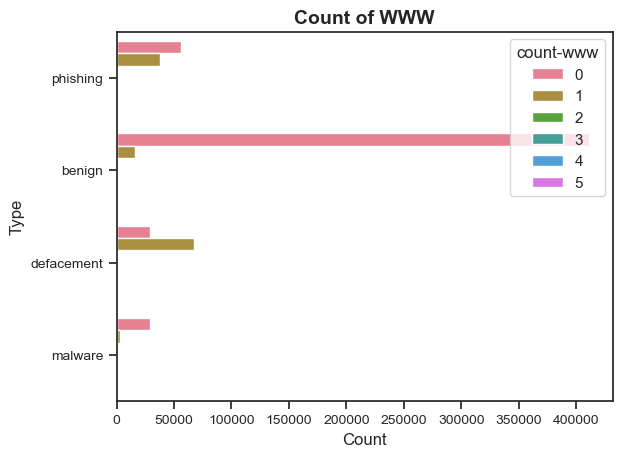

<Figure size 800x600 with 0 Axes>

In [16]:
# Set the style
sns.set(style="ticks")

# Create the countplot with custom styling
ax = sns.countplot(y="type", data=df, hue="count-www", palette="husl")

# Set the title and axes labels
ax.set_title("Count of WWW", fontsize=14, fontweight='bold')
ax.set_xlabel("Count", fontsize=12)
ax.set_ylabel("Type", fontsize=12)

# Modify the font size of the tick labels
ax.tick_params(axis='both', which='major', labelsize=10)

# Adjust the figure size
plt.figure(figsize=(8, 6))

# Remove the top and right spines
sns.despine()

# Show the plot
plt.show()


In [17]:
def count_https(url):
    return url.count('https')

df['count-https'] = df['url'].apply(lambda i : count_https(i))

def count_http(url):
    return url.count('http')

df['count-http'] = df['url'].apply(lambda i : count_http(i))
def count_per(url):
    return url.count('%')

df['count%'] = df['url'].apply(lambda i : count_per(i))

def count_ques(url):
    return url.count('?')

df['count?'] = df['url'].apply(lambda i: count_ques(i))

def count_hyphen(url):
    return url.count('-')

df['count-'] = df['url'].apply(lambda i: count_hyphen(i))

def count_equal(url):
    return url.count('=')

df['count='] = df['url'].apply(lambda i: count_equal(i))

def url_length(url):
    return len(str(url))


#Length of URL
df['url_length'] = df['url'].apply(lambda i: url_length(i))
#Hostname Length

def hostname_length(url):
    return len(urlparse(url).netloc)

df['hostname_length'] = df['url'].apply(lambda i: hostname_length(i))

df.head()


def suspicious_words(url):
    match = re.search('PayPal|login|signin|bank|account|update|free|lucky|service|bonus|ebayisapi|webscr',
                      url)
    if match:
        return 1
    else:
        return 0
df['sus_url'] = df['url'].apply(lambda i: suspicious_words(i))


def digit_count(url):
    digits = 0
    for i in url:
        if i.isnumeric():
            digits = digits + 1
    return digits


df['count-digits']= df['url'].apply(lambda i: digit_count(i))


def letter_count(url):
    letters = 0
    for i in url:
        if i.isalpha():
            letters = letters + 1
    return letters


df['count-letters']= df['url'].apply(lambda i: letter_count(i))

df.head()

url        type  url_type  \
0                                   br-icloud.com.br    phishing         2   
1                mp3raid.com/music/krizz_kaliko.html      benign         0   
2                    bopsecrets.org/rexroth/cr/1.htm      benign         0   
3  http://www.garage-pirenne.be/index.php?option=...  defacement         1   
4  http://adventure-nicaragua.net/index.php?optio...  defacement         1   

   use_of_ip  abnormal_url  count.  count-www  count@  count_dir  \
0          0             0       2          0       0          0   
1          0             0       2          0       0          2   
2          0             0       2          0       0          3   
3          0             1       3          1       0          1   
4          0             1       2          0       0          1   

   count_embed_domian  ...  count-http  count%  count?  count-  count=  \
0                   0  ...           0       0       0       1       0   
1                   0  ...           0       0       0       0       0   
2                   0  ...           0       0       0       0       0   
3                   0  ...           1       0       1       1       4   
4                   0  ...           1       0       1       1       3   

   url_length  hostname_length  sus_url  count-digits  count-letters  
0          16                0        0             0             13  
1          35                0        0             1             29  
2          31                0        0             1             25  
3          88               21        0             7             63  
4         235               23        0            22            199  

[5 rows x 22 columns]

In [18]:
df.head()

url        type  url_type  \
0                                   br-icloud.com.br    phishing         2   
1                mp3raid.com/music/krizz_kaliko.html      benign         0   
2                    bopsecrets.org/rexroth/cr/1.htm      benign         0   
3  http://www.garage-pirenne.be/index.php?option=...  defacement         1   
4  http://adventure-nicaragua.net/index.php?optio...  defacement         1   

   use_of_ip  abnormal_url  count.  count-www  count@  count_dir  \
0          0             0       2          0       0          0   
1          0             0       2          0       0          2   
2          0             0       2          0       0          3   
3          0             1       3          1       0          1   
4          0             1       2          0       0          1   

   count_embed_domian  ...  count-http  count%  count?  count-  count=  \
0                   0  ...           0       0       0       1       0   
1                   0  ...           0       0       0       0       0   
2                   0  ...           0       0       0       0       0   
3                   0  ...           1       0       1       1       4   
4                   0  ...           1       0       1       1       3   

   url_length  hostname_length  sus_url  count-digits  count-letters  
0          16                0        0             0             13  
1          35                0        0             1             29  
2          31                0        0             1             25  
3          88               21        0             7             63  
4         235               23        0            22            199  

[5 rows x 22 columns]

In [19]:
def secure_http(url):
    scheme = urlparse(url).scheme
    if scheme == 'https':
        return 1
    else:
        return 0

In [20]:
df['secure_http']= df['url'].apply(lambda i: secure_http(i))

In [21]:
df.head()

url        type  url_type  \
0                                   br-icloud.com.br    phishing         2   
1                mp3raid.com/music/krizz_kaliko.html      benign         0   
2                    bopsecrets.org/rexroth/cr/1.htm      benign         0   
3  http://www.garage-pirenne.be/index.php?option=...  defacement         1   
4  http://adventure-nicaragua.net/index.php?optio...  defacement         1   

   use_of_ip  abnormal_url  count.  count-www  count@  count_dir  \
0          0             0       2          0       0          0   
1          0             0       2          0       0          2   
2          0             0       2          0       0          3   
3          0             1       3          1       0          1   
4          0             1       2          0       0          1   

   count_embed_domian  ...  count%  count?  count-  count=  url_length  \
0                   0  ...       0       0       1       0          16   
1                   0  ...       0       0       0       0          35   
2                   0  ...       0       0       0       0          31   
3                   0  ...       0       1       1       4          88   
4                   0  ...       0       1       1       3         235   

   hostname_length  sus_url  count-digits  count-letters  secure_http  
0                0        0             0             13            0  
1                0        0             1             29            0  
2                0        0             1             25            0  
3               21        0             7             63            0  
4               23        0            22            199            0  

[5 rows x 23 columns]

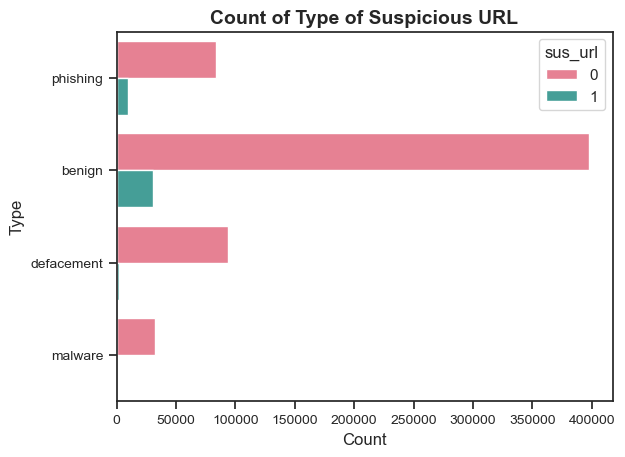

<Figure size 800x600 with 0 Axes>

In [22]:
# Set the style
sns.set(style="ticks")

# Create the countplot with custom styling
ax = sns.countplot(y="type", data=df, hue="sus_url", palette="husl")

# Set the title and axes labels
ax.set_title("Count of Type of Suspicious URL", fontsize=14, fontweight='bold')
ax.set_xlabel("Count", fontsize=12)
ax.set_ylabel("Type", fontsize=12)

# Modify the font size of the tick labels
ax.tick_params(axis='both', which='major', labelsize=10)

# Adjust the figure size
plt.figure(figsize=(8, 6))

# Remove the top and right spines
sns.despine()

# Show the plot
plt.show()


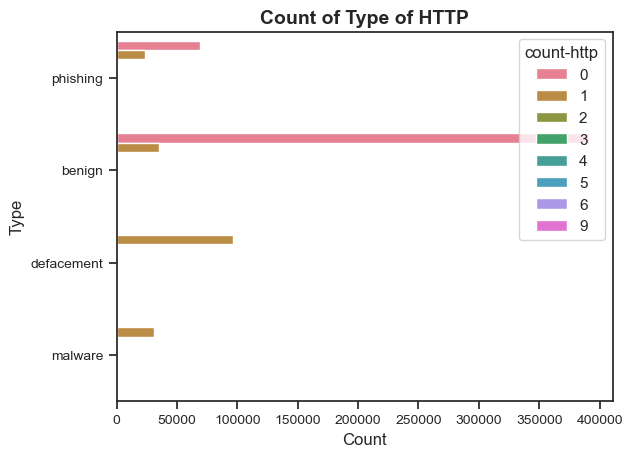

<Figure size 800x600 with 0 Axes>

In [23]:
# Set the style
sns.set(style="ticks")

# Create the countplot with custom styling
ax = sns.countplot(y="type", data=df, hue="count-http", palette="husl")

# Set the title and axes labels
ax.set_title("Count of Type of HTTP", fontsize=14, fontweight='bold')
ax.set_xlabel("Count", fontsize=12)
ax.set_ylabel("Type", fontsize=12)

# Modify the font size of the tick labels
ax.tick_params(axis='both', which='major', labelsize=10)

# Adjust the figure size
plt.figure(figsize=(8, 6))

# Remove the top and right spines
sns.despine()

# Show the plot
plt.show()


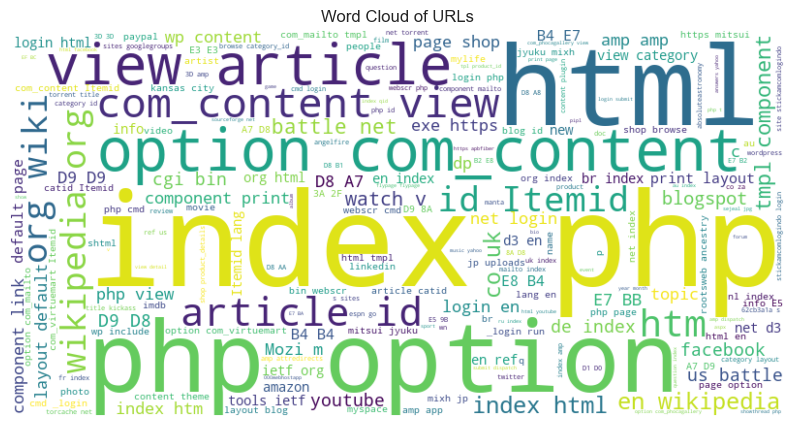

In [24]:
# Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['url']))
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of URLs')
plt.show()

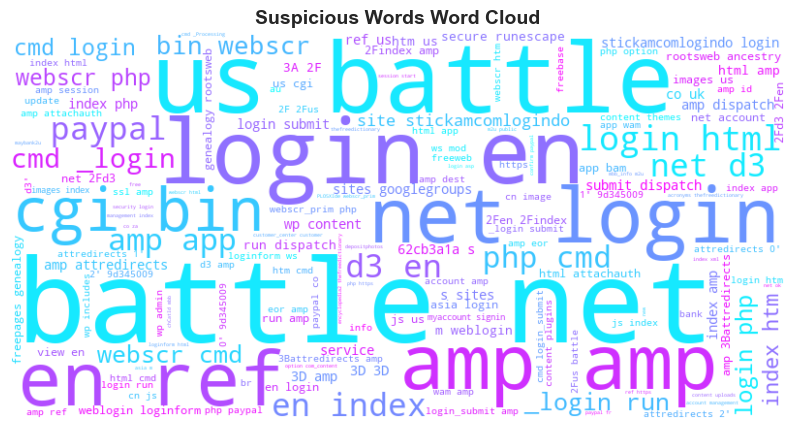

In [25]:
# Create a string of all the suspicious words
suspicious_words = ' '.join(df[df['sus_url'] == 1]['url'])

# Set the word cloud parameters
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='cool', random_state=42)

# Generate the word cloud
wordcloud.generate(suspicious_words)

# Set the style for the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Suspicious Words Word Cloud', fontsize=14, fontweight='bold')

# Show the word cloud
plt.show()


In [26]:
df.head()

url        type  url_type  \
0                                   br-icloud.com.br    phishing         2   
1                mp3raid.com/music/krizz_kaliko.html      benign         0   
2                    bopsecrets.org/rexroth/cr/1.htm      benign         0   
3  http://www.garage-pirenne.be/index.php?option=...  defacement         1   
4  http://adventure-nicaragua.net/index.php?optio...  defacement         1   

   use_of_ip  abnormal_url  count.  count-www  count@  count_dir  \
0          0             0       2          0       0          0   
1          0             0       2          0       0          2   
2          0             0       2          0       0          3   
3          0             1       3          1       0          1   
4          0             1       2          0       0          1   

   count_embed_domian  ...  count%  count?  count-  count=  url_length  \
0                   0  ...       0       0       1       0          16   
1                   0  ...       0       0       0       0          35   
2                   0  ...       0       0       0       0          31   
3                   0  ...       0       1       1       4          88   
4                   0  ...       0       1       1       3         235   

   hostname_length  sus_url  count-digits  count-letters  secure_http  
0                0        0             0             13            0  
1                0        0             1             29            0  
2                0        0             1             25            0  
3               21        0             7             63            0  
4               23        0            22            199            0  

[5 rows x 23 columns]

In [27]:
df.isnull().sum()

url                   0
type                  0
url_type              0
use_of_ip             0
abnormal_url          0
count.                0
count-www             0
count@                0
count_dir             0
count_embed_domian    0
short_url             0
count-https           0
count-http            0
count%                0
count?                0
count-                0
count=                0
url_length            0
hostname_length       0
sus_url               0
count-digits          0
count-letters         0
secure_http           0
dtype: int64

In [28]:
df.fillna(0,inplace=True)

In [29]:
df.isnull().sum()

url                   0
type                  0
url_type              0
use_of_ip             0
abnormal_url          0
count.                0
count-www             0
count@                0
count_dir             0
count_embed_domian    0
short_url             0
count-https           0
count-http            0
count%                0
count?                0
count-                0
count=                0
url_length            0
hostname_length       0
sus_url               0
count-digits          0
count-letters         0
secure_http           0
dtype: int64

In [30]:
# Select only the numeric columns from the DataFrame
numeric_data = df.select_dtypes(include='number')

# Compute the correlation matrix
corr_matrix = numeric_data.corr()

# Create the heatmap trace
heatmap = go.Heatmap(
    z=corr_matrix.values,
    x=corr_matrix.columns,
    y=corr_matrix.columns,
    colorscale='Greys',  # Use a grayscale color scale
)

# Create the layout
layout = go.Layout(
    title='Correlation Heatmap (Numeric Values Only)',
    xaxis=dict(title='Variables'),
    yaxis=dict(title='Variables'),
    plot_bgcolor='black',  # Set the background color to black
    paper_bgcolor='black',  # Set the plot area background color to black
    font=dict(color='white')  # Set the font color to white
)

# Create the Figure object
fig = go.Figure(data=heatmap, layout=layout)

# Display the heatmap
fig.show()


In [31]:
df.head()

url        type  url_type  \
0                                   br-icloud.com.br    phishing         2   
1                mp3raid.com/music/krizz_kaliko.html      benign         0   
2                    bopsecrets.org/rexroth/cr/1.htm      benign         0   
3  http://www.garage-pirenne.be/index.php?option=...  defacement         1   
4  http://adventure-nicaragua.net/index.php?optio...  defacement         1   

   use_of_ip  abnormal_url  count.  count-www  count@  count_dir  \
0          0             0       2          0       0          0   
1          0             0       2          0       0          2   
2          0             0       2          0       0          3   
3          0             1       3          1       0          1   
4          0             1       2          0       0          1   

   count_embed_domian  ...  count%  count?  count-  count=  url_length  \
0                   0  ...       0       0       1       0          16   
1                   0  ...       0       0       0       0          35   
2                   0  ...       0       0       0       0          31   
3                   0  ...       0       1       1       4          88   
4                   0  ...       0       1       1       3         235   

   hostname_length  sus_url  count-digits  count-letters  secure_http  
0                0        0             0             13            0  
1                0        0             1             29            0  
2                0        0             1             25            0  
3               21        0             7             63            0  
4               23        0            22            199            0  

[5 rows x 23 columns]

In [32]:
df.isnull().sum()

url                   0
type                  0
url_type              0
use_of_ip             0
abnormal_url          0
count.                0
count-www             0
count@                0
count_dir             0
count_embed_domian    0
short_url             0
count-https           0
count-http            0
count%                0
count?                0
count-                0
count=                0
url_length            0
hostname_length       0
sus_url               0
count-digits          0
count-letters         0
secure_http           0
dtype: int64

In [33]:
# Pie chart for 'url_type' column
url_type_counts = df['url_type'].value_counts()
fig = go.Figure(data=[go.Pie(labels=url_type_counts.index, values=url_type_counts.values)])
fig.update_layout(title='Distribution of URL Types',
                  template='plotly_dark',
                  font=dict(color='white'),
                  showlegend=True)
fig.show()

In [34]:
#Importing dependencies
from urllib.parse import urlparse
from tld import get_tld
import os.path

#First Directory Length
def fd_length(url):
    urlpath= urlparse(url).path
    try:
        return len(urlpath.split('/')[1])
    except:
        return 0

df['fd_length'] = df['url'].apply(lambda i: fd_length(i))

#Length of Top Level Domain
df['tld'] = df['url'].apply(lambda i: get_tld(i,fail_silently=True))


def tld_length(tld):
    try:
        return len(tld)
    except:
        return -1

df['tld_length'] = df['tld'].apply(lambda i: tld_length(i))

In [35]:
df = df.drop("tld",1)

C:\Users\DELL\AppData\Local\Temp\ipykernel_19340\2551734815.py:1: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.



In [36]:
df.columns

Index(['url', 'type', 'url_type', 'use_of_ip', 'abnormal_url', 'count.',
       'count-www', 'count@', 'count_dir', 'count_embed_domian', 'short_url',
       'count-https', 'count-http', 'count%', 'count?', 'count-', 'count=',
       'url_length', 'hostname_length', 'sus_url', 'count-digits',
       'count-letters', 'secure_http', 'fd_length', 'tld_length'],
      dtype='object')

In [37]:
df.shape

(651191, 25)

In [38]:
df.duplicated().sum()

10066

In [39]:
df.drop_duplicates(inplace=True)

In [40]:
df.columns

Index(['url', 'type', 'url_type', 'use_of_ip', 'abnormal_url', 'count.',
       'count-www', 'count@', 'count_dir', 'count_embed_domian', 'short_url',
       'count-https', 'count-http', 'count%', 'count?', 'count-', 'count=',
       'url_length', 'hostname_length', 'sus_url', 'count-digits',
       'count-letters', 'secure_http', 'fd_length', 'tld_length'],
      dtype='object')

In [41]:
df.head()

url        type  url_type  \
0                                   br-icloud.com.br    phishing         2   
1                mp3raid.com/music/krizz_kaliko.html      benign         0   
2                    bopsecrets.org/rexroth/cr/1.htm      benign         0   
3  http://www.garage-pirenne.be/index.php?option=...  defacement         1   
4  http://adventure-nicaragua.net/index.php?optio...  defacement         1   

   use_of_ip  abnormal_url  count.  count-www  count@  count_dir  \
0          0             0       2          0       0          0   
1          0             0       2          0       0          2   
2          0             0       2          0       0          3   
3          0             1       3          1       0          1   
4          0             1       2          0       0          1   

   count_embed_domian  ...  count-  count=  url_length  hostname_length  \
0                   0  ...       1       0          16                0   
1                   0  ...       0       0          35                0   
2                   0  ...       0       0          31                0   
3                   0  ...       1       4          88               21   
4                   0  ...       1       3         235               23   

   sus_url  count-digits  count-letters  secure_http  fd_length  tld_length  
0        0             0             13            0          0          -1  
1        0             1             29            0          5          -1  
2        0             1             25            0          7          -1  
3        0             7             63            0          9           2  
4        0            22            199            0          9           3  

[5 rows x 25 columns]

In [42]:
df.isnull().sum()

url                   0
type                  0
url_type              0
use_of_ip             0
abnormal_url          0
count.                0
count-www             0
count@                0
count_dir             0
count_embed_domian    0
short_url             0
count-https           0
count-http            0
count%                0
count?                0
count-                0
count=                0
url_length            0
hostname_length       0
sus_url               0
count-digits          0
count-letters         0
secure_http           0
fd_length             0
tld_length            0
dtype: int64

In [43]:
from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
df["type_code"] = lb_make.fit_transform(df["type"])
df["type_code"].value_counts()

0    428080
1     95308
3     94092
2     23645
Name: type_code, dtype: int64

In [44]:
X = df[['use_of_ip','abnormal_url', 'count.', 'count-www', 'count@',
       'count_dir', 'count_embed_domian', 'short_url', 'count-https',
       'count-http', 'count%', 'count?', 'count-', 'count=', 'url_length',
       'hostname_length', 'sus_url', 'fd_length', 'tld_length', 'count-digits',
       'count-letters']]

#Target Variable
y = df['type_code']

In [45]:
X.head()

use_of_ip  abnormal_url  count.  count-www  count@  count_dir  \
0          0             0       2          0       0          0   
1          0             0       2          0       0          2   
2          0             0       2          0       0          3   
3          0             1       3          1       0          1   
4          0             1       2          0       0          1   

   count_embed_domian  short_url  count-https  count-http  ...  count?  \
0                   0          0            0           0  ...       0   
1                   0          0            0           0  ...       0   
2                   0          0            0           0  ...       0   
3                   0          0            0           1  ...       1   
4                   0          0            0           1  ...       1   

   count-  count=  url_length  hostname_length  sus_url  fd_length  \
0       1       0          16                0        0          0   
1       0       0          35                0        0          5   
2       0       0          31                0        0          7   
3       1       4          88               21        0          9   
4       1       3         235               23        0          9   

   tld_length  count-digits  count-letters  
0          -1             0             13  
1          -1             1             29  
2          -1             1             25  
3           2             7             63  
4           3            22            199  

[5 rows x 21 columns]

In [46]:
X.columns

Index(['use_of_ip', 'abnormal_url', 'count.', 'count-www', 'count@',
       'count_dir', 'count_embed_domian', 'short_url', 'count-https',
       'count-http', 'count%', 'count?', 'count-', 'count=', 'url_length',
       'hostname_length', 'sus_url', 'fd_length', 'tld_length', 'count-digits',
       'count-letters'],
      dtype='object')

In [47]:
 X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3, random_state=42)

In [48]:
print(f"X_train Shape : {X_train.shape}")
print(f"Y_train Shape : {y_train.shape}")
print(f"X_test  Shape : {X_test.shape}")
print(f"Y_test  Shape : {y_test.shape}")

X_train Shape : (448787, 21)
Y_train Shape : (448787,)
X_test  Shape : (192338, 21)
Y_test  Shape : (192338,)


#############################################
######-Model => AdaBoostClassifier 
Test Accuracy:  29.52%  
              Classification Report 
              precision    recall  f1-score   support

           0       0.96      0.18      0.30    128371
           1       0.91      0.91      0.91     28591
           2       0.02      0.42      0.04      7050
           3       0.39      0.19      0.26     28326

    accuracy                           0.30    192338
   macro avg       0.57      0.42      0.38    192338
weighted avg       0.83      0.30      0.37    192338

             Confusion Matrix 


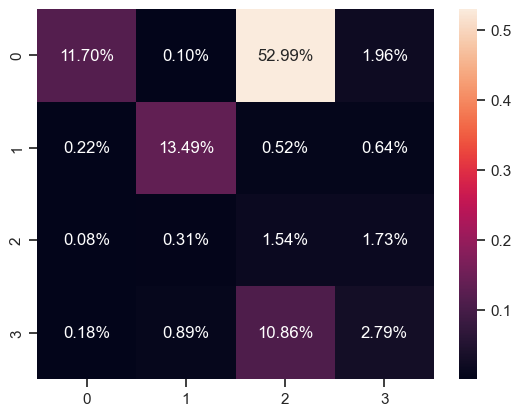

###################- End -###################
#############################################
######-Model => MLPClassifier 
Test Accuracy:  95.26%  
              Classification Report 
              precision    recall  f1-score   support

           0       0.96      0.99      0.97    128371
           1       0.96      0.97      0.96     28591
           2       0.94      0.86      0.90      7050
           3       0.89      0.81      0.85     28326

    accuracy                           0.95    192338
   macro avg       0.94      0.91      0.92    192338
weighted avg       0.95      0.95      0.95    192338

             Confusion Matrix 


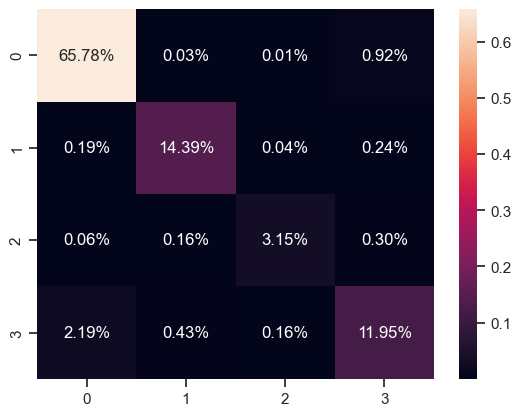

###################- End -###################
#############################################
######-Model => RandomForestClassifier 
Test Accuracy:  96.53%  
              Classification Report 
              precision    recall  f1-score   support

           0       0.97      0.98      0.98    128371
           1       0.98      0.99      0.99     28591
           2       0.98      0.91      0.95      7050
           3       0.91      0.86      0.88     28326

    accuracy                           0.97    192338
   macro avg       0.96      0.94      0.95    192338
weighted avg       0.96      0.97      0.96    192338

             Confusion Matrix 


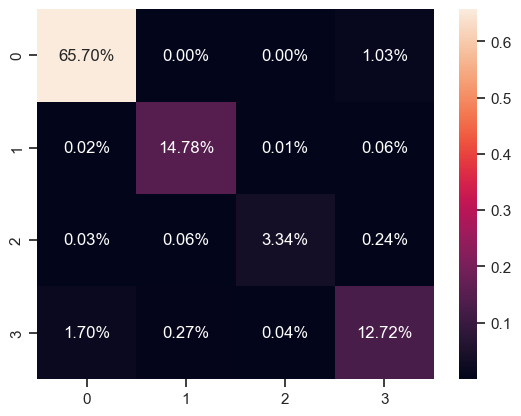

###################- End -###################
#############################################
######-Model => GaussianNB 
Test Accuracy:  82.68%  
              Classification Report 
              precision    recall  f1-score   support

           0       0.90      0.90      0.90    128371
           1       0.66      1.00      0.80     28591
           2       0.66      0.59      0.62      7050
           3       0.71      0.40      0.51     28326

    accuracy                           0.83    192338
   macro avg       0.73      0.72      0.71    192338
weighted avg       0.83      0.83      0.82    192338

             Confusion Matrix 


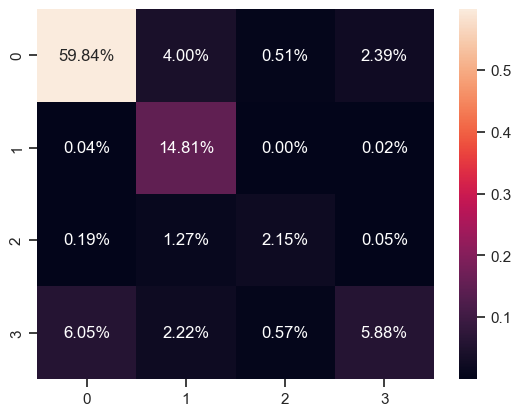

###################- End -###################
#############################################
######-Model => ExtraTreesClassifier 
Test Accuracy:  96.46%  
              Classification Report 
              precision    recall  f1-score   support

           0       0.97      0.98      0.98    128371
           1       0.98      0.99      0.98     28591
           2       0.98      0.91      0.95      7050
           3       0.91      0.86      0.88     28326

    accuracy                           0.96    192338
   macro avg       0.96      0.94      0.95    192338
weighted avg       0.96      0.96      0.96    192338

             Confusion Matrix 


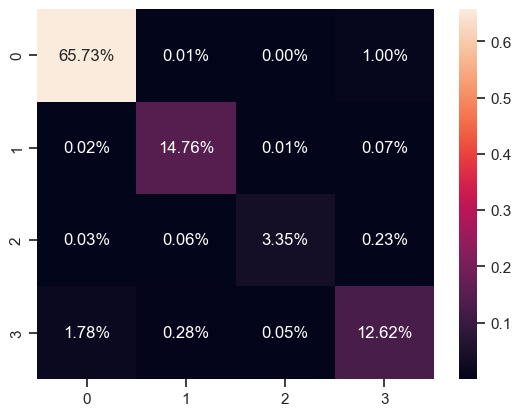

###################- End -###################


In [49]:
from sklearn.preprocessing import LabelEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pickle

models = [
   AdaBoostClassifier(),
    MLPClassifier(),
    RandomForestClassifier(),
    GaussianNB(),
    ExtraTreesClassifier()
]
#save model
with open(r"C:\Users\DELL\Downloads\saved_models.pkl", "wb") as file:
    pickle.dump(models, file)
    
results = []

for model in models:
    print('#############################################')
    print('######-Model =>\033[07m {} \033[0m'.format(type(model).__name__))
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    f1_score = report['macro avg']['f1-score']
    precision = report['macro avg']['precision']
    recall = report['macro avg']['recall']
    
    results.append({
        'Model': type(model).__name__,
        'Accuracy': accuracy,
        'F1-Score': f1_score,
        'Precision': precision,
        'Recall': recall
    })
    
    print('Test Accuracy:\033[32m \033[01m {:.2f}% \033[30m \033[0m'.format(accuracy * 100))
    print('\033[01m              Classification Report \033[0m')
    print(classification_report(y_test, y_pred))
    print('\033[01m             Confusion Matrix \033[0m')
    cf_matrix = confusion_matrix(y_test, y_pred)
    plot_ = sns.heatmap(cf_matrix / np.sum(cf_matrix), annot=True, fmt='0.2%')
    plt.show()
    print('\033[31m###################- End -###################\033[0m')

In [50]:
# Save the results as a CSV file
results_df = pd.DataFrame(results)
results_df.to_csv('evaluation_results.csv', index=False)

In [51]:
# Check if results is empty
if not results:
    print("No results found. Please ensure that models are evaluated correctly.")
else:
    # Generate models report table
    models_report = pd.DataFrame(results)
    models_report.head()

    # Create the Plotly figure for the models report table
    fig = go.Figure(data=go.Table(
        header=dict(values=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score'],
                    fill_color='green',
                    font=dict(color='white'),
                    align='center'),
        cells=dict(values=[models_report['Model'], models_report['Accuracy'], models_report['Precision'],
                           models_report['Recall'], models_report['F1-Score']],
                   fill_color='black',
                   font=dict(color='white'),
                   align='center')))

    # Update layout for dark background and white font
    fig.update_layout(
        paper_bgcolor='white',
        plot_bgcolor='white',
        font=dict(color='black'))

    # Display the models report table
    fig.show()

In [52]:

    # Generate bar charts for each metric in the models report
    for column in models_report.columns:
        fig = go.Figure(data=go.Bar(
            x=models_report['Model'],
            y=models_report[column],
            marker=dict(color='#331354'),
            text=models_report[column],
            textposition='auto'
        ))

        fig.update_layout(
            title_text=column,
            xaxis_title='Model',
            yaxis_title=column,
            plot_bgcolor='rgb(232, 224, 240)',
            paper_bgcolor='rgb(232, 224, 240)',
            font=dict(color='black')
        )

        fig.show()

In [54]:
import pandas as pd
import numpy as np
import pickle

# Function for feature extraction
def extract_features(url):
    features = {}
    features['use_of_ip'] = having_ip_address(url)
    features['abnormal_url'] = abnormal_url(url)
    features['count.'] = url.count('.')
    features['count-www'] = url.count('www')
    features['count@'] = url.count('@')
    features['count_dir'] = url.count('/')
    features['count_embed_domian'] = no_of_embed(url)
    features['short_url'] = shortening_service(url)
    features['count-https'] = url.count('https')
    features['count-http'] = url.count('http')
    features['count%'] = url.count('%')
    features['count?'] = url.count('?')
    features['count-'] = url.count('-')
    features['count='] = url.count('=')
    features['url_length'] = len(url)
    features['secure_http']=secure_http(url)
    features['hostname_length'] = hostname_length(url)
#     features['sus_url'] = suspicious_words(url)
    features['count-digits'] = digit_count(url)
    features['count-letters'] = len(url)
    features['fd_length'] = fd_length(url)
    features['tld_length'] = tld_length(url)
    return pd.DataFrame(features, index=[0])

# Function for prediction
def predict_url(url):
    # Load the saved models
    with open(r"C:\Users\DELL\Downloads\saved_models.pkl", "rb") as file:
        saved_models = pickle.load(file)

    # Convert the list of models to a dictionary
    saved_models = {type(model).__name__: model for model in saved_models}

    features = extract_features(url)
    features_test = np.array(features).reshape((1, -1))  # Reshape the features as a single-sample 2D array
    predictions = {}

    for model_name, model in saved_models.items():
        if model_name != 'primary_domain_encoder':
            # Make predictions
            model.fit(X_train, y_train)
            prediction = model.predict(features_test)[0]
            predictions[model_name] = prediction

    return predictions

def generate_html_output(results):
    html_output = """
    <style>
        .container {
            display: flex;
            justify-content: center;
            align-items: center;
            flex-direction: column;
            height: 100vh;
            background-color: #F9EFFC ;
        }

        header h1 {
            font-size: 40px;
            font-weight: 600;
            background-image: linear-gradient(to bottom left, #9B59B6, #3C1A4A);
            color: transparent;
            background-clip: text;
            -webkit-background-clip: text;
        }

        .description {
            margin-bottom: 20px;
            font-size: 14px;
            text-align: center;
            font-family: Arial, sans-serif;
            font-style: italic;
        }

        .styled-table {
            border-collapse: collapse;
            margin: 25px 0;
            font-size: 0.9em;
            font-family: sans-serif;
            min-width: 400px;
            box-shadow: 0 0 20px rgba(0, 0, 0, 0.15);
        }

        .styled-table thead tr {
            background-color: #6C3483;
            color: #ffffff;
            text-align: left;
        }

        .styled-table th,
        .styled-table td {
            padding: 12px 15px;
        }

        .styled-table tbody tr {
            border-bottom: 1px solid #dddddd;
        }

        .styled-table tbody tr:nth-of-type(even) {
            background-color: #f3f3f3;
        }

        .styled-table tbody tr:last-of-type {
            border-bottom: 2px solid #009879;
        }

        .styled-table tbody tr.active-row {
            font-weight: bold;
            color: #009879;
        }
    </style>
    """

    html_output += """
    <div class="container">
        <header>
            <h1><center>MULTI-CLASS URL CLASSIFICATION SYSTEM</center></h1>
        </header>

        <div class="description">
            <br>&#8226; Benign &#8594; 0  &nbsp; &nbsp;  &#8226; Defacement &#8594; 1</br>
            <br>&#8226; Phishing &#8594; 2 &nbsp; &nbsp; &#8226; Malware &#8594; 3</br>
        </div>
        <table class="styled-table">
            <thead>
                <tr>
                    <th>Model</th>
                    <th>Prediction</th>
                </tr>
            </thead>
            <tbody>
    """

    for model_name, prediction in results.items():
        html_output += f"<tr><td>{model_name}</td><td>{prediction}</td></tr>"

    html_output += """
            </tbody>
        </table>
    </div>
    """

    return html_output

# Get user input for URL
user_url = input("Enter a URL: ")

# Perform prediction
results = predict_url(user_url)

# Generate HTML output
html_output = generate_html_output(results)

# Save the HTML output to a file
with open("predictions.html", "w") as file:
    file.write(html_output)

# Open the HTML file in a web browser
import webbrowser
webbrowser.open("predictions.html")

#try url
"""
espn.go.com/nba/player/_/id/3457/brandon-rush
onlineradio7.com/listen/CFLO_1047
myptccash.com
http://www.annamodlo.com.ua/index.html
http://9779.info/%E5%8D%8A%E7%AB%8B%E4%BD%93%E5%B9%BC%E5%84%BF%E5%89%AA%E8%B4%B4%E7%94%BB/

"""


Enter a URL: myptccash.com


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but AdaBoostClassifier was fitted with feature names

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but MLPClassifier was fitted with feature names

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but GaussianNB was fitted with feature names

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but ExtraTreesClassifier was fitted with feature names



'\nespn.go.com/nba/player/_/id/3457/brandon-rush\nonlineradio7.com/listen/CFLO_1047\nmyptccash.com\nhttp://www.annamodlo.com.ua/index.html\nhttp://9779.info/%E5%8D%8A%E7%AB%8B%E4%BD%93%E5%B9%BC%E5%84%BF%E5%89%AA%E8%B4%B4%E7%94%BB/\n\n'